<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Evaluating Context Relevance</h1>

**What is Context Relevance?**: Context relevance score measures if the retrieved context has enough information to answer the question being asked. A bad context reduces the chances of the model giving a relevant response to the question asked, as well as leads to hallucinations.

For example, if the question asked is "How does a fan cool a room?" and the context provided is "A fan is a machine used to create flow within a fluid, typically a gas such as air." then the response given by the model should be relevant to the question asked. However, if the context provided is "A fan is a person who is very interested in a particular activity or subject." then the response given by the model will not be relevant to the question asked.

[Read our blog to learn more about context retrieval in LLMs.](https://uptrain.ai/blog/a-comprehensive-guide-to-context-retrieval-in-llms)

**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description |
| ----------- | ----------- |
| question | The question asked by the user |
| context | Additional information provided that can be used to answer the question |

 
If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).
 

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
cases_with_good_context = [
    {
        'question': 'How does photosynthesis work?',
        'context': 'Like tiny solar factories, plants trap sunlight in their leaves using a green pigment called chlorophyll. This light energy fuels a magical process called photosynthesis, where plants combine water and carbon dioxide to make their own food (glucose) and release precious oxygen back into the air. This energy-packed glucose fuels their growth and keeps them thriving, making them the powerhouses of our planet\'s ecosystems.'
    },
    {
        'question': 'What is the capital of France?',
        'context': 'Paris, the City of Lights, is the capital of France and a global center for art, fashion, gastronomy, and culture. Its 19th-century cityscape is crisscrossed by wide boulevards and the Seine River. Beyond such iconic landmarks as the Eiffel Tower and the 12th-century Notre Dame Cathedral, the city is known for its charming cafes, trendy boutiques, and rich history. '
    },
    {
        'question': 'Who wrote "Romeo and Juliet"?',
        'context': "Romeo and Juliet is a timeless tragedy by William Shakespeare about two star-crossed lovers from feuding families, the Montagues and the Capulets. Despite the bitter rivalry between their houses, Romeo and Juliet fall passionately in love at first sight. Their clandestine romance blossoms amidst the danger and secrecy of their forbidden relationship. However, fate intervenes with a series of misunderstandings and tragic circumstances, ultimately leading to their deaths."
    }
]

cases_with_bad_context = [
    {
        'question': 'What is the capital of France?',
        'context': 'France, context for its exquisite pastries and fashion, has a capital city. It\'s a place where people speak French and enjoy baguettes. I once heard that the Eiffel Tower was built by aliens, but don\'t quote me on that.'
    },
    {
        'question': 'Who wrote "Romeo and Juliet"?',
        'context': "Hamlet, the Prince of Denmark, is Shakespeare's most complex and enigmatic character. Grappling with grief and betrayal, he contemplates life, death, and revenge in some of the Bard's most famous soliloquies. Consumed by the ghost of his murdered father's demands, Hamlet feigns madness to navigate the treacherous political landscape of Elsinore Castle"
    },
]

data = cases_with_good_context + cases_with_bad_context

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-********************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.CONTEXT_RELEVANCE]
)

2024-01-11 13:50:19.382 | INFO     | uptrain.framework.evalllm:evaluate:100 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(res,indent=3))

[
   {
      "question": "How does photosynthesis work?",
      "context": "Like tiny solar factories, plants trap sunlight in their leaves using a green pigment called chlorophyll. This light energy fuels a magical process called photosynthesis, where plants combine water and carbon dioxide to make their own food (glucose) and release precious oxygen back into the air. This energy-packed glucose fuels their growth and keeps them thriving, making them the powerhouses of our planet's ecosystems.",
      "score_context_relevance": 1.0,
      "explanation_context_relevance": "The question asks about how photosynthesis works, and the extracted context provides a clear explanation of the process of photosynthesis, including the role of sunlight, chlorophyll, water, and carbon dioxide in producing glucose and oxygen. Therefore, the extracted context can answer the given question completely.\n\n1.0\n1.0"
   },
   {
      "question": "What is the capital of France?",
      "context": "Paris, t

## Step 4: Let's look at some of the results 

### Sample with good context

In [5]:
print(json.dumps(res[0],indent=3))

{
   "question": "How does photosynthesis work?",
   "context": "Like tiny solar factories, plants trap sunlight in their leaves using a green pigment called chlorophyll. This light energy fuels a magical process called photosynthesis, where plants combine water and carbon dioxide to make their own food (glucose) and release precious oxygen back into the air. This energy-packed glucose fuels their growth and keeps them thriving, making them the powerhouses of our planet's ecosystems.",
   "score_context_relevance": 1.0,
   "explanation_context_relevance": "The question is asking about how photosynthesis works. The extracted context provides a clear explanation of how photosynthesis works, describing the process of plants trapping sunlight, using chlorophyll, and combining water and carbon dioxide to make their own food and release oxygen. Therefore, the extracted context can answer the given question completely.\n\n1.0\n1.0"
}


### Sample with bad context

In [6]:
print(json.dumps(res[4],indent=3))

{
   "question": "Who wrote \"Romeo and Juliet\"?",
   "context": "Hamlet, the Prince of Denmark, is Shakespeare's most complex and enigmatic character. Grappling with grief and betrayal, he contemplates life, death, and revenge in some of the Bard's most famous soliloquies. Consumed by the ghost of his murdered father's demands, Hamlet feigns madness to navigate the treacherous political landscape of Elsinore Castle",
   "score_context_relevance": 0.0,
   "explanation_context_relevance": "The question is asking about the author of \"Romeo and Juliet\", but the extracted context is about Hamlet, the Prince of Denmark, and his struggles. There is no mention of \"Romeo and Juliet\" or its author in the extracted context. Therefore, the extracted context doesn't contain any information to answer the given question.\n\n0.0\n0.0"
}


## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [11]:
from uptrain import APIClient, Evals
import json

UPTRAIN_API_KEY = "up-********************"  # Insert your UpTrain key here

uptrain_client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

res = uptrain_client.log_and_evaluate(
    "Sample-context-relevance-evals",
    data,
    [Evals.CONTEXT_RELEVANCE]
)

2024-01-11 13:50:26.011 | INFO     | uptrain.framework.remote:log_and_evaluate:507 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [12]:
print(json.dumps(res,indent=3))

[
   {
      "question": "How does photosynthesis work?",
      "context": "Like tiny solar factories, plants trap sunlight in their leaves using a green pigment called chlorophyll. This light energy fuels a magical process called photosynthesis, where plants combine water and carbon dioxide to make their own food (glucose) and release precious oxygen back into the air. This energy-packed glucose fuels their growth and keeps them thriving, making them the powerhouses of our planet's ecosystems.",
      "score_context_relevance": 1.0,
      "explanation_context_relevance": "The question is asking about how photosynthesis works. The extracted context provides information about how plants trap sunlight using chlorophyll, and how they use this light energy to combine water and carbon dioxide to make their own food (glucose) and release oxygen. This information directly addresses the process of photosynthesis, explaining how it works in plants. Therefore, the extracted context can answer th

### Dashboards: 
Histogram of score vs number of cases with that score

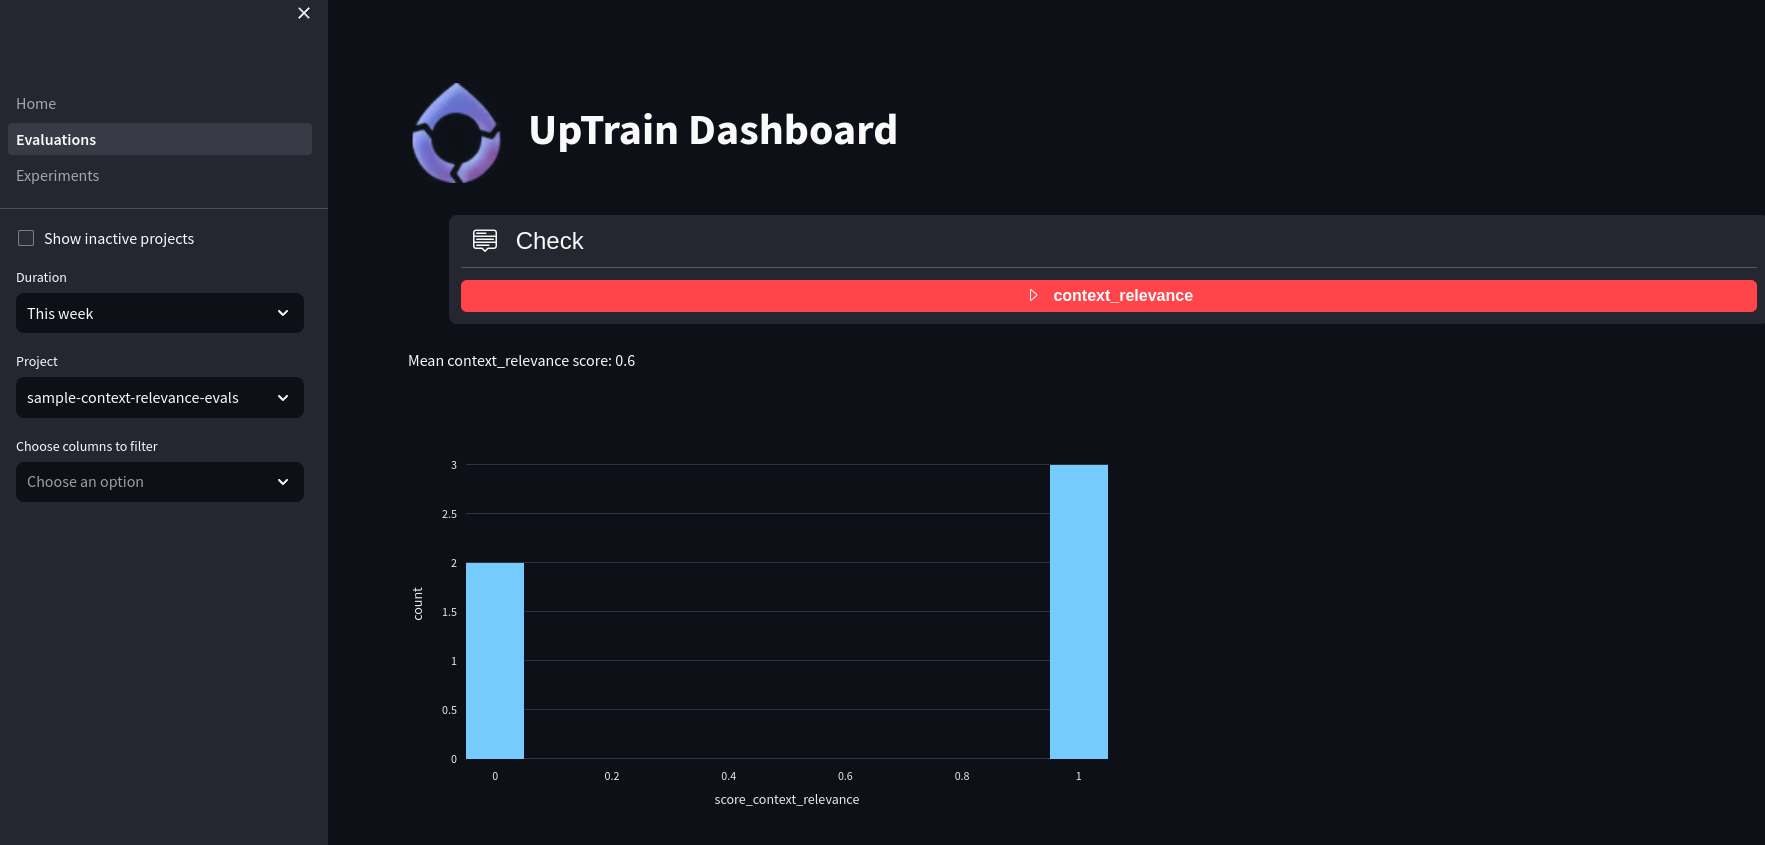

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

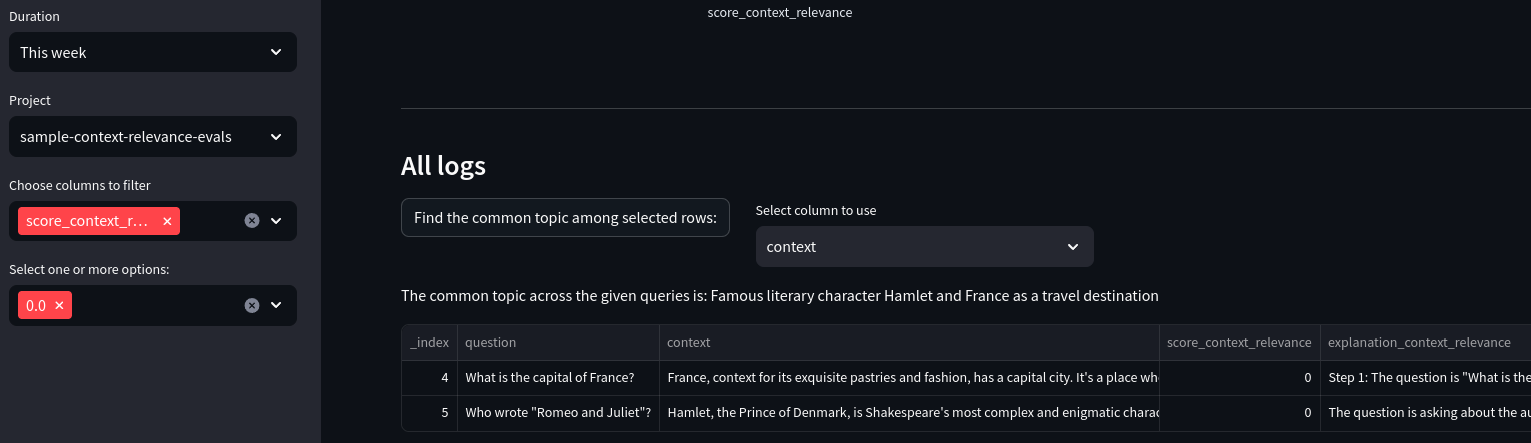